**Importing Libraries and Data Visualization**

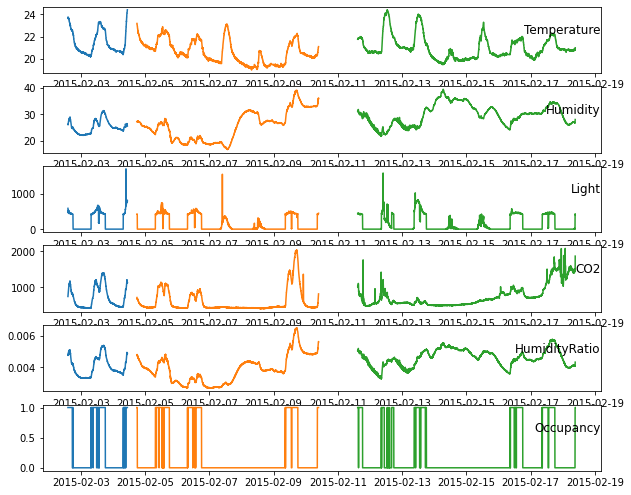

In [40]:
#import all the necessary libraries
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

# load all data
data1 = read_csv('/content/drive/My Drive/datatest.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data2 = read_csv('/content/drive/My Drive/datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data3 = read_csv('/content/drive/My Drive/datatest2.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
'''
csv stands for comma separated variables. The code interprets the variable appearing as a new variable.
(Open the txt file and look at the structure)

We will use the pandas read_csv() command to read the text file. the read_csv() function has various attributes
to control the input data. We will focus on some of these here.
filepath= specify the path location of the file
header=specify the row number to be used as the column headers
index_col=columns to use as row headers
parse_dates=converts a string data into the datetime format.
squeeze=If the parsed data only contains one column then return a Series (of the form pd.Series)
'''

# determine the number of features
n_features = data1.values.shape[1]

#visualize each of the variables 
plt.figure(figsize=(10,10))
for i in range(1, n_features):
	# specify the subpout
	plt.subplot(n_features, 1, i) #use plt.subplot to plot multiple plots in 1 plot.
	# plot data from each set
	plt.plot(data1.index, data1.values[:, i])
	plt.plot(data2.index, data2.values[:, i])
	plt.plot(data3.index, data3.values[:, i])
	# add a readable name to the plot
	plt.title(data1.columns[i], y=0.5, loc='right')
plt.show()

In [41]:
#print out the 5 rows
data1.head()

,no,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:19:00,140,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,141,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,142,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,143,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,144,23.7540,26.200,488.600000,779.000000,0.004767,1


**Data Preprocessing**

In [42]:
#combine all the three dataset into 1 single dataset
data = pd.concat([data1, data2, data3])

# drop row number
'''
We de not need the column 'no' as it serves no purpose to our analysis. Hence we drop the column from our
dataframe use data.drop()
'''
data.drop('no', axis=1, inplace=True)

# save aggregated dataset
data.to_csv('combined.csv')

**Data Splitting**

In [43]:
from sklearn.model_selection import train_test_split
# load the dataset
data = read_csv('combined.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]  #the last column is the output variable
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)

In [44]:
print(trainX)
print(trainy)

[[2.37000000e+01 2.62720000e+01 5.85200000e+02 7.49200000e+02
  4.76416302e-03]
 [2.37180000e+01 2.62900000e+01 5.78400000e+02 7.60400000e+02
  4.77266099e-03]
 [2.37300000e+01 2.62300000e+01 5.72666667e+02 7.69666667e+02
  4.76515255e-03]
 ...
 [1.97900000e+01 3.62675000e+01 0.00000000e+00 5.06333333e+02
  5.18218665e-03]
 [1.97900000e+01 3.62900000e+01 0.00000000e+00 5.10333333e+02
  5.18542843e-03]
 [1.97900000e+01 3.62900000e+01 0.00000000e+00 5.10000000e+02
  5.18542843e-03]]
[1. 1. 1. ... 0. 0. 0.]


### **Model Development and Analysis**

**Logistic Regression**

In [45]:
#import the necessary functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#define an instance of the LogisticRegression class
model = LogisticRegression(penalty="l2",C=1.0,fit_intercept=True,max_iter=100)
'''
penalty= the regularization applied on the model. 'l1' or 'l2'
C= the inverse of regularization strength
fit_intercept= have the beta0 term as well in the equation
max_iter= maximum number of iterations
'''
# fit the model on the training set
model.fit(trainX, trainy)

# predict the test set
yhat = model.predict(testX)

In [46]:
#display the output classes of the model
model.classes_

array([0., 1.])

In [47]:
#print out the model parameters beta_i
print(model.intercept_)
print(model.coef_)

[-0.02394808]
[[-5.86475059e-01  1.33253504e-01  2.06555534e-02  3.27933512e-03
   7.05895995e-06]]


In [48]:
#predict the probability of the output being equal to 0 and 1.
model.predict_proba(testX)
#the first column gives the probability of output=0 and the second column gives probability of output=1

array([[0.99419593, 0.00580407],
       [0.99412932, 0.00587068],
       [0.99420538, 0.00579462],
       ...,
       [0.0057155 , 0.9942845 ],
       [0.00423524, 0.99576476],
       [0.0025597 , 0.9974403 ]])

In [49]:
#predict class labels 
model.predict(testX)

array([0., 0., 0., ..., 1., 1., 1.])

In [50]:
# evaluate model accuracy. The arguments are true values testy and predicted values yhat
score = accuracy_score(testy, yhat)
print(score)

0.992704280155642


In [51]:
#build a confusion matrix to better understand the result
from sklearn.metrics import confusion_matrix
confusion_matrix(testy, model.predict(testX))

array([[5027,   44],
       [   1, 1096]])

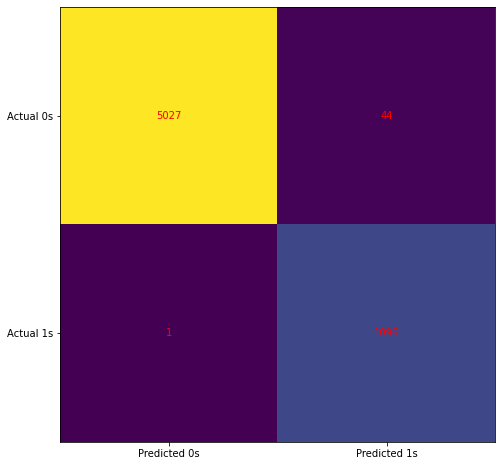

In [53]:
#visualize the confusion matrix as a heat map
conf_mat = confusion_matrix(testy, model.predict(testX))  
#use the confusion_matrix() function with arguments-true output and predicted output

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.grid(False)
#divide the plot into 4 sections
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')
plt.show()

**Support Vector Machine**

In [82]:
#import svm function from the sklearn library
from sklearn import svm
model = svm.SVC(kernel='poly',degree=2,C=1,max_iter=1000) #define an instance of SVC class
'''
kernel=Define the non-linear kernel to be used
degree= specify the degree for polynomial kernel
C= penalty term. It is the inverse of regularization coefficient. 
max_iter=maximum iterations to perform.
'''
model.fit(trainX,trainy)  #fit the model on train data and label

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
 #print out the support vectors
 #(try changing the value of C and look at the number of support vectors)
 model.support_vectors_

array([[2.26000000e+01, 2.50666667e+01, 4.28333333e+02, 8.49333333e+02,
        4.24961035e-03],
       [2.26000000e+01, 2.52000000e+01, 4.22500000e+02, 8.53000000e+02,
        4.27236993e-03],
       [2.26000000e+01, 2.52000000e+01, 4.23666667e+02, 8.53000000e+02,
        4.27236993e-03],
       ...,
       [2.12000000e+01, 3.27000000e+01, 4.19000000e+02, 5.74333333e+02,
        5.09649146e-03],
       [2.12675000e+01, 3.27225000e+01, 4.11500000e+02, 5.72000000e+02,
        5.12136756e-03],
       [2.12900000e+01, 3.27900000e+01, 0.00000000e+00, 5.77000000e+02,
        5.13916508e-03]])

In [84]:
#get the index of the support vectors
model.support_

array([  195,   196,   197,   198,   199,   200,   201,   202,   203,
         204,   205,   206,   207,   208,   209,   210,   211,   212,
         213,   214,   215,   216,   217,  1040,  1041,  1042,  1043,
        1131,  1132,  1289,  1320,  1321,  1322,  1371,  1395,  1396,
        1397,  1398,  1399,  2489,  2490,  2491,  2492,  2493,  2534,
        2535,  2536,  2537,  2538,  2539,  2540,  2558,  2559,  2589,
        2590,  3493,  3494,  3495,  3536,  3656,  3657,  3658,  3659,
        3787,  3788,  3789,  3790,  3791,  3792,  3793,  3794,  3795,
        3796,  3797,  3810,  3811,  3812,  3813,  3814,  3815,  3816,
        3817,  3818,  3848,  3849,  3850,  3851,  3852,  3853,  3854,
        3855,  3856,  3857,  3858,  3859,  3860,  3861,  3862,  3863,
        3864,  3865,  3866,  3867,  3868,  3869,  3870,  3871,  3872,
        3875,  3876,  3877,  3878,  3879,  3880,  3881,  3882,  3883,
        3884,  3885,  4936,  4937,  4938,  4939,  4940,  4942,  4943,
        5166,  5167,

In [85]:
#get the count of support vectors for each of the classes
model.n_support_

array([440, 440], dtype=int32)

In [86]:
#predict the output using the trained model and print the accuracy
yhat = model.predict(testX)
score = accuracy_score(testy, yhat)
print(score)

0.9782749675745784


In [87]:
#get the confusion matrix
confusion_matrix(testy, model.predict(testX))

array([[4968,  103],
       [  31, 1066]])

# **Visualization for Maximal margin classifier and SVM**

**Maximal Margin Classifier**

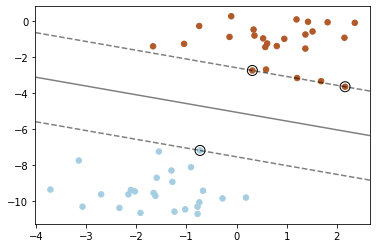

In [88]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

#We will create a syntehtic dataset in order to visualize the maximal margin classifier
#create n separable points using sklearn.dataset's make_blobs function
#blobs are points in the space centered around a common center
X, y = make_blobs(n_samples=50, centers=2,random_state=2)
#We are using a fixed random state for demonstration purpose, feel free to change the state and observe the effect
#You will find that not all data would be separable without misclassifers.

# fit the model on the generated data
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

#plot the generated data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

## plot the decision function
ax = plt.gca()    #function to create or set axes
xlim = ax.get_xlim()    #get the limit of x-axis
ylim = ax.get_ylim()    #get the limit of y-axis

# create grid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)  #create 30 points between max and min of x
yy = np.linspace(ylim[0], ylim[1], 30)  #create 30 points between max and min of y
YY, XX = np.meshgrid(yy, xx) #create a meshgrid of x and y values
xy = np.vstack([XX.ravel(), YY.ravel()]).T    #np.ravel() returns a 1D array of input
Z = clf.decision_function(xy).reshape(XX.shape)   #Evaluates the decision function for the samples in xy.

# plot decision boundary and margins.
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**Support Vector Machine**

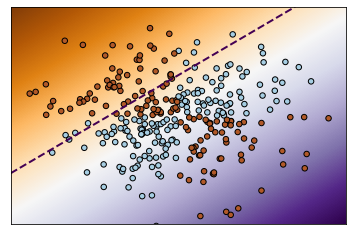

In [93]:
'''
Code adapted from:
 https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py
'''

#import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#Meshgrid returns 2-D grid coordinates based on the coordinates contained in vectors x and y.
#X is a matrix where each row is a copy of x, and Y is a matrix where each column is a copy of y. 
#The grid represented by the coordinates X and Y has length(y) rows and length(x) columns.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)   #get random 300 2D-points 
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  #output label is the XOR of input. 
#We will see that XOR output cannot be separated using a linear boundary.

# fit the model using svm
#try using different kernels and visualize the result
clf = svm.SVC(kernel="linear",degree=5,gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()